In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.decomposition import PCA
import warnings

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
data = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
sample_data = data.data[:300]

In [4]:
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5)
X_sample = vectorizer.fit_transform(sample_data)
X_dense = X_sample.toarray()

In [5]:
X_reduced = PCA(n_components=100, random_state=42).fit_transform(X_dense)

In [6]:
af = AffinityPropagation(preference=-400, max_iter=1000, convergence_iter=50, random_state=42)
af.fit(X_reduced)

labels = af.labels_
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)

print("Jumlah cluster yang terbentuk:", n_clusters_)

Jumlah cluster yang terbentuk: 300


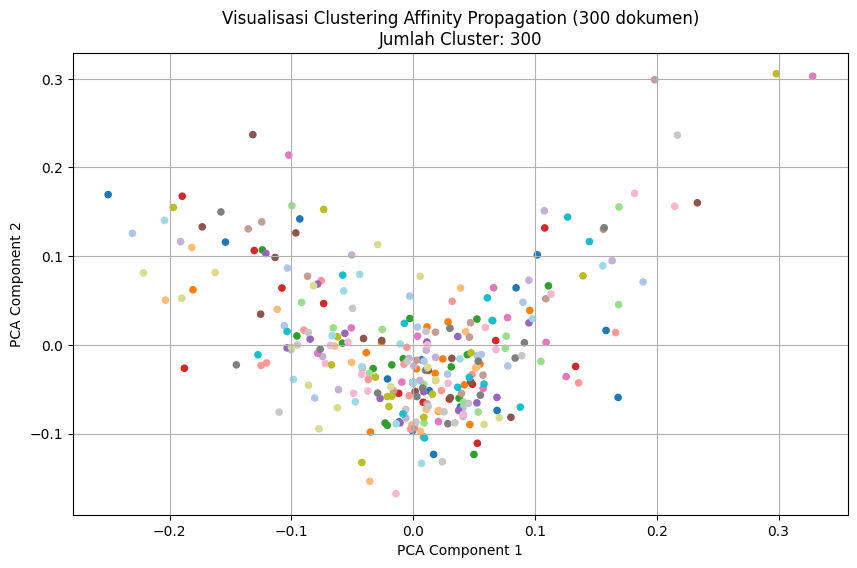

In [7]:
X_vis = PCA(n_components=2, random_state=42).fit_transform(X_dense[:300])
labels_vis = labels[:300]

plt.figure(figsize=(10, 6))
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=labels_vis, cmap='tab20', s=20)
plt.title(f'Visualisasi Clustering Affinity Propagation (300 dokumen)\nJumlah Cluster: {n_clusters_}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()